### The project on Health Insurance Dataset. 
#### The goal is to explore how different features influence on the cost of treatment (parameter "charges") and create the best prediction model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.simplefilter('ignore')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

#### First it is necessary to create DataFrame from csv file. I have explored it and have found some statistics indicators.




In [2]:
data = pd.read_csv("insurance.csv")
df = data.copy()

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### So there are 7 features: 3 of categorical and 4 of numeric data. As the "charges" feature is numeric, it is required to create regression model. There are no "Nan" objects in Data.
#### After that let's encode categorical features to create the heatmap of dataset. It can show the correlation between different parameters.


In [6]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.apply(LabelEncoder().fit_transform)

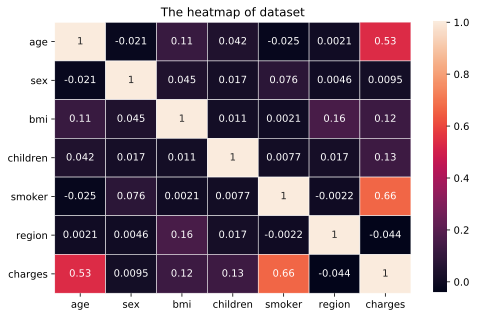

In [7]:
f, ax = plt.subplots(figsize=(8, 5));

sns.heatmap(df_encoded.corr(), annot=True, linewidths=.5);
plt.title("The heatmap of dataset");

#### The heatmap shows strong correlation between "charges" as goal feature and "age", "smoker". In my view we should look at these features more closely. Other parameters doesn't have much value, because they have weeker correlation, but let's make some dashboards to make sure of it.
                                            


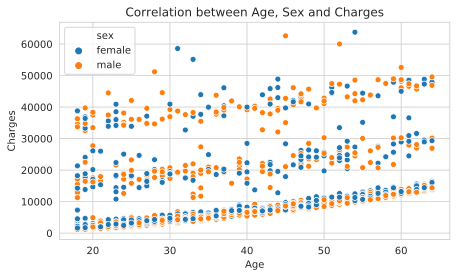

In [8]:
sns.set_style("whitegrid")

plt.figure(figsize=(7, 4));
sns.scatterplot(x="age", y="charges", data=df, hue="sex");
plt.xlabel("Age");
plt.ylabel("Charges");
plt.title("Correlation between Age, Sex and Charges");

#### The "charges" feature increases with age. We can see it on scatterplot and joinplot. There is no strong correlation between charges and gender.

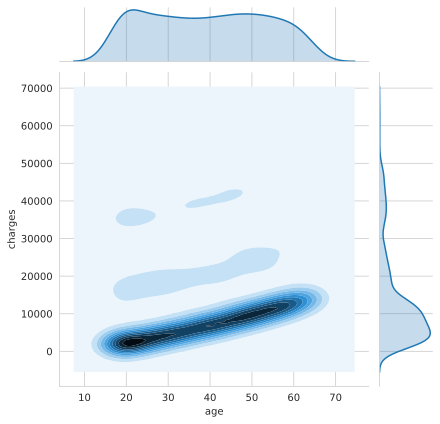

In [9]:
g = sns.jointplot(x="age", y="charges", data=df, kind="kde");


#### Charges for smokers are greater but there are more non-smokers than smokers.

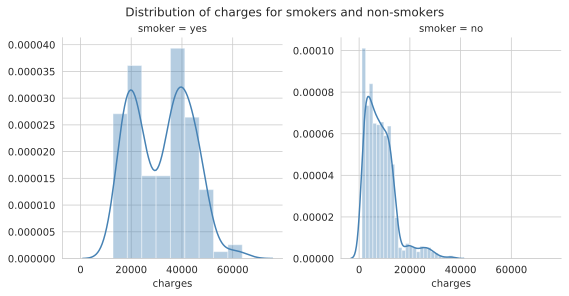

In [10]:
g = sns.FacetGrid(df, col="smoker", sharey=False, size=4);

g.map(sns.distplot, "charges", color="steelblue");
g.fig.suptitle('Distribution of charges for smokers and non-smokers',
               verticalalignment="bottom");

#### It's doesn't seems like "bma" feature has some influence on charges. The age parameter we discussed earlier. And each plot tells about strong influence of "smoke" feature.

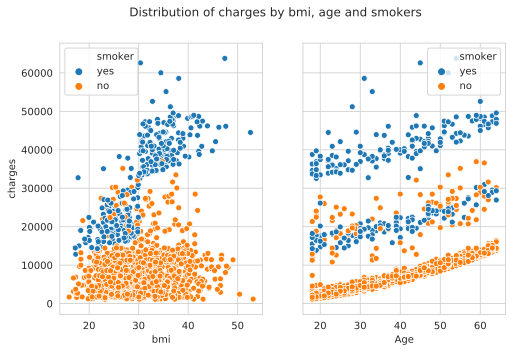

In [11]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 5));

sns.scatterplot(x="bmi", y="charges", data=df, hue="smoker", ax=axes[0]);
plt.xlabel("bmi");
plt.ylabel("Charges");
_.suptitle('Distribution of charges by bmi, age and smokers', fontsize=12)

sns.scatterplot(x="age", y="charges", data=df, hue="smoker", ax=axes[1]);
plt.xlabel("Age");
plt.ylabel("Charges");

#### The boxplots of "region" and "children" features show that they doesn't influence on charges.

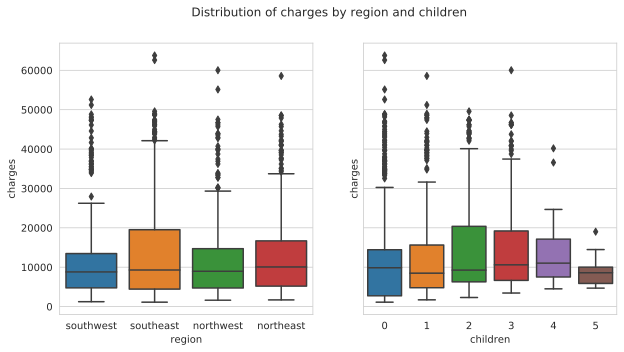

In [12]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 5));
sns.boxplot(x="region", y="charges", data=df, ax=axes[0]);
sns.boxplot(x="children", y="charges", data=df);
_.suptitle('Distribution of charges by region and children', fontsize=12);

###  The conclusion of Data visualisation.
#### As correlation matrix showed: "smoker" feature has the greatest influence on "charges". To solve the objective of regression, we should look on this feature first of all. But it looks like we can't ignore the other parameters due to limited number of them.

#### Now it's time to create models. But first I have created dummy variables.

In [13]:
df = pd.get_dummies(df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#### There are several methods to assess the accuracy of model. First is to split the Dataset on training and test parts. Second is to look at the coefficient of determination $R^2$ and mean squared error. I have downloded them from sklearn library.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

X = df.drop(columns=['charges'])
y = df['charges']

train_X, test_X, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=0)

#### Linear regression is the first model to create. We will build on results of this basic model.

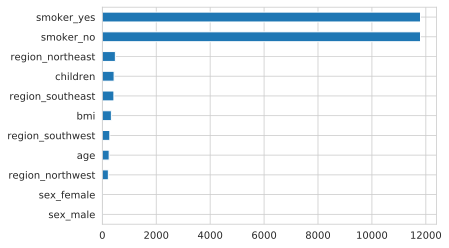

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_X, train_y)

coefficients = lr.coef_

feature_importance = pd.Series(
    coefficients, index=train_X.columns).abs().sort_values(ascending=True)
feature_importance.plot.barh()
plt.show()

#### Attribute "coef_" means  the relevance coefficient of features in the decision function. So it means that the conclusion of Data visualization  was correct and feature "smoker" has the biggest influence on the regression model.

#### Now its time to assess the accuracy of Linear model.

In [16]:
lr_pred_y = lr.predict(test_X)
lr_mse = mean_squared_error(test_y, lr_pred_y)

print('Model mse: {:0.3}, Model Rmse: {:0.3}, Model r2: {:1}'.format(
    lr_mse, np.math.sqrt(lr_mse), r2_score(test_y, lr_pred_y)))

Model mse: 3.18e+07, Model Rmse: 5.64e+03, Model r2: 0.7999876970680434


In [17]:
lr_cv = cross_val_score(lr, X, y, cv=10)

print("Accuracy: {:.3} (+/-{:.3})".format(lr_cv.mean(), lr_cv.std() * 2))

Accuracy: 0.745 (+/-0.0859)


#### So Linear regression model shows the accuracy 0.745 on the cross validation. Not so bad. Since there is no overfitting  its not necessary to use regularization. We can move on and try Polynomial regression.


In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(train_X)
X_test_poly = poly_features.fit_transform(test_X)
X_poly = poly_features.fit_transform(X)

poly = LinearRegression()
poly.fit(X_train_poly, train_y)

poly_pred_y = poly.predict(X_test_poly)
poly_mse = mean_squared_error(test_y, poly_pred_y)

print('Model mse: {:0.3}, Model Rmse: {:0.3}, Model r2: {:1}'.format(
    poly_mse, np.math.sqrt(poly_mse), r2_score(test_y, poly_pred_y)))

poly_cv = cross_val_score(poly, X_poly, y, cv=7)

print("Accuracy: {:.3} (+/-{:.3})".format(poly_cv.mean(), poly_cv.std() * 2))

Model mse: 4.39e+07, Model Rmse: 6.62e+03, Model r2: 0.7242141048272615
Accuracy: 0.786 (+/-0.111)


#### It's interesting that Polynomial Regression shows better accuracy on the cross validation, but MSE and $R^2$ metrics are worse. And it is still not enough. The next model is Random Forest.

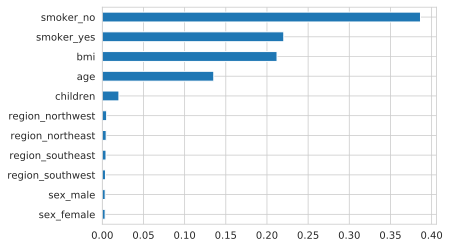

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0).fit(train_X, train_y)

coefficients = rf.feature_importances_

feature_importance = pd.Series(
    coefficients, index=X.columns).abs().sort_values(ascending=True)
feature_importance.plot.barh()
plt.show()

#### Smoker is still the most important feature, but Random forest regressor also considers the "age" and "bmi". Lets check its metrics.

In [20]:
rf_pred_y = rf.predict(test_X)
rf_mse = mean_squared_error(test_y, rf_pred_y)

print('Model mse: {:0.3}, Model Rmse: {:0.3}, Model r2: {:1}'.format(
    rf_mse, np.math.sqrt(rf_mse), r2_score(test_y, rf_pred_y)))

rf_cv = cross_val_score(rf, X, y, cv=7)
print("Accuracy: {:.3} (+/-{:.3})".format(rf_cv.mean(), rf_cv.std() * 2))

Model mse: 1.95e+07, Model Rmse: 4.42e+03, Model r2: 0.8772319196923088
Accuracy: 0.836 (+/-0.0844)


#### There are very good rates on unconfigured model. I'm afraid of overfitting, but cross validation shows big accuracy, so it seems like there is not. Then let's configure the model with the help of Grid search.

In [21]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'bootstrap': [True, False],
    "max_depth": [3, 5, 7, 10],
    "max_features": ['auto', 3, 4],
    "n_estimators": [50, 100, 150, 200],
    'criterion': ['mae', 'mse']
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=hyperparameters,
                           cv=3,
                           n_jobs=3)

grid_search.fit(train_X, train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [22]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Grid search best score {:0.3} and best parameters:\n{!s}".format(best_score, best_params))

Grid search best score 0.843 and best parameters:
{'bootstrap': True, 'criterion': 'mse', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 200}


#### Grid Search found best parameters for Random forest model. Let's train the model with them and check it's metrics. 

In [23]:
rf_grid = RandomForestRegressor(bootstrap=True,
                                 criterion="mse",
                                 max_depth=3,
                                 max_features="auto",
                                 n_estimators=200,
                                 random_state=0).fit(train_X, train_y)

rf_grid_pred_y = rf_grid.predict(test_X)
rf_grid_mse = mean_squared_error(test_y, rf_grid_pred_y)

print('Model mse: {:0.3}, Model Rmse: {:0.3}, Model r2: {:1}'.format(
    rf_grid_mse, np.math.sqrt(rf_grid_mse), r2_score(test_y,
                                                       rf_grid_pred_y)))

rf_grid_cv = cross_val_score(rf_grid, X, y, cv=7)
print("Accuracy: {:.3} (+/-{:.3})".format(rf_grid_cv.mean(),
                                          rf_grid_cv.std() * 2))

Model mse: 1.74e+07, Model Rmse: 4.17e+03, Model r2: 0.8906514661101144
Accuracy: 0.852 (+/-0.0837)


#### Very good results. Next step is xgboost model. It should be very useful, but also it's resource-intensive and depends on parameter tuning. Therefore we can't use grid search for tuning because it would take a long time. In this case it's better to use RandomizedSearch. It can approximate model parameters.

In [24]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
hyperparameters = {
    'eta': [0.01, 0.1],
    'colsample_bytree': [0.4, 0.8, 1],
    'gamma': [0, 0.03, 0.1],
    'min_child_weight': [1.5, 3, 6],
    'learning_rate': [0.1, 0.07],
    'max_depth': [3, 5],
    'n_estimators': [100, 1000],
    'subsample': [0.6, 0.95, 1.5]
}
xgb = xgboost.XGBRegressor()
n_iter_search = 100
random_search = RandomizedSearchCV(xgb,
                                   param_distributions=hyperparameters,
                                   n_iter=n_iter_search,
                                   n_jobs=-1,
                                   cv=3,
                                   random_state=0)

random_search.fit(X, y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.4, 0.8, 1],
                                        'eta': [0.01, 0

In [25]:
best_params = random_search.best_params_
best_score = random_search.best_score_
print(best_params)
print(best_score)


{'subsample': 0.95, 'n_estimators': 100, 'min_child_weight': 6, 'max_depth': 3, 'learning_rate': 0.07, 'gamma': 0, 'eta': 0.01, 'colsample_bytree': 1}
0.858699329871536


#### Now let's create Grid search  with these approximate parameters.

In [26]:
parameters_for_testing = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2,3,4,6],
    'learning_rate': [ 0.05, 0.07,0.09],
    'min_child_weight': [2, 3, 4, 6],
    'colsample_bytree': [0.8, 1, 1.5]
}
xgb = xgboost.XGBRegressor(eta=0.01, gamma=0, subsample=1, nthread=6)

gsearch = GridSearchCV(estimator=xgb,
                       param_grid=parameters_for_testing,
                       n_jobs=3,
                       cv=3)
gsearch.fit(train_X, train_y)
print('Best params:')
print(gsearch.best_params_)
print('Best score:')
print(gsearch.best_score_)


Best params:
{'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 100}
Best score:
0.8501146231633361


In [27]:
xgb = xgboost.XGBRegressor(n_estimators=100,
                           eta=0.01,
                           colsample_bytree=1,
                           learning_rate=0.05,
                           max_depth=3,
                           min_child_weight=2,
                           gamma=0,
                           subsample=1,
                           nthread=6)
xgb.fit(train_X, train_y)

xgb_pred_y = xgb.predict(test_X)
xgb_mse = mean_squared_error(test_y, xgb_pred_y)

print('Model mse: {:0.3}, Model Rmse: {:0.3}, Model r2: {:1}'.format(
    xgb_mse, np.math.sqrt(xgb_mse), r2_score(test_y, xgb_pred_y)))

xgb_cv = cross_val_score(xgb, X, y, cv=10)
print("Accuracy: {:.3} (+/-{:.3})".format(xgb_cv.mean(), xgb_cv.std() * 2))

Model mse: 1.58e+07, Model Rmse: 3.97e+03, Model r2: 0.9010002620913398
Accuracy: 0.861 (+/-0.0873)


#### I think I found good option. As I mentioned before its hard to tune xgboost model, so better decision may exist. But accuracy 0.861 on cross validation and $R^2$ 0.901 look like a good model. Now let's plot the results to find some patterns.

#### Now let's compare the results and xgboost predictions and plot it by charge.

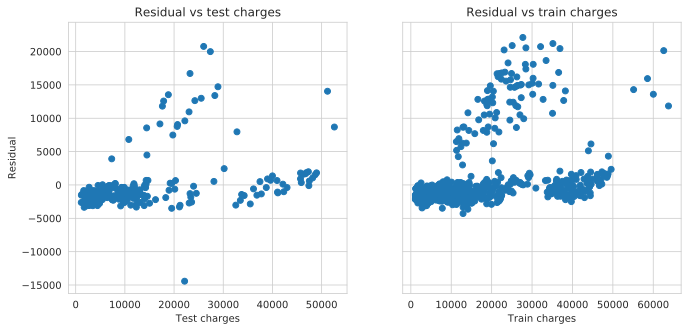

In [28]:
pred_y = xgb.predict(train_X)
residual_test = test_y - xgb_pred_y
residual_train = train_y - pred_y

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(11, 5))

ax1.scatter(test_y, residual_test);
ax1.set_title("Residual vs test charges");
ax1.set_xlabel("Test charges");
ax1.set_ylabel("Residual")

ax2.scatter(train_y, residual_train);
ax2.set_title("Residual vs train charges");
ax2.set_xlabel("Train charges");


#### The plots show Interesting picture. The biggest part of wrong predictions is between 10000 and 35000 amount of charges. Lets explore it with dataset where charges will be in this interval. 

In [29]:
df1=data[df.charges>10000]
df1=df1[df1.charges<35000]
df1.shape

(493, 7)

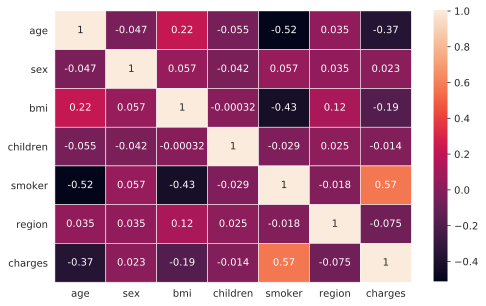

In [30]:
f, ax = plt.subplots(figsize=(8, 5));
df1_encoded = df1.apply(LabelEncoder().fit_transform)
sns.heatmap(df1_encoded.corr(), annot=True, linewidths=.5);

#### There is the negative correlation between age and charges. It's interesting because on whole model we got positive. The same issue is with bmi.


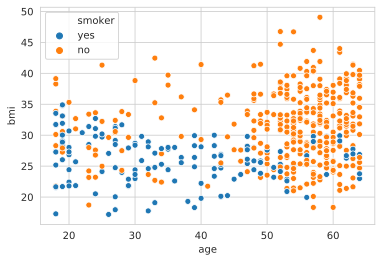

In [31]:
s = sns.scatterplot(x="age", y="bmi", data=df1, hue="smoker");


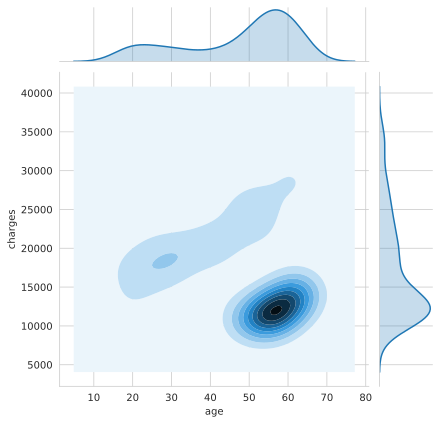

In [32]:
g = sns.jointplot(x="age", y="charges", data=df1, kind="kde");

####  Joinplot shows that people with age 45+ prevail in our sample, meanwhile the whole dataset has equal distribution of "age" parameter. Let's build Random forest model to find the features with the greatest influence.

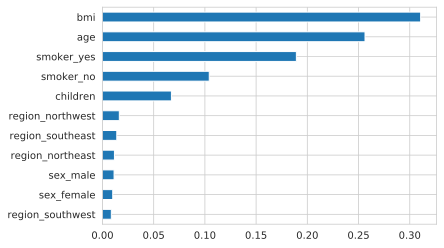

In [33]:
df1 = pd.get_dummies(df1)
X = df1.drop(columns=['charges'])
y = df1['charges']
rf1 = RandomForestRegressor().fit(df1.drop(columns=["charges"]), df1.charges)
coefficients = rf1.feature_importances_
feature_importance = pd.Series(
    coefficients, index=X.columns).abs().sort_values(ascending=True)
feature_importance.plot.barh()
plt.show()


#### We see that "bmi" and "age" features are on the top. These results differ from the whole dataset. Probably there is some cluster with old people and bmi feature somehow triggers it.

### Conclusion.

### I trained 4 regression models. As usual xgboost shows best results of Mse, $R^2$ and on the cross validation so it is the best option. But to ensure that the model is proper it's necessary  to verify it on new raw data. Also there is a pattern of mistakes which should be explored on new data with cluster and visual analysis.